# Unsupervised Learning on Country Data

## Data Introduction 

We will be working with data from Kaggle :  [Unsupervised Learning on Country Data](https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data)

The dataset includes Economic infomations like income, GDP per Capital, inflation, exports and also the health info like total health spending and death of childen under years old.

## Research Question

Using the socio-economic and health factors to categorise the countries, and make a suggestion to HELP International Organization which countries needs to focus on the most and need of aid.

### Import Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sqlalchemy import create_engine
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics

In [2]:
df = pd.read_csv('/Users/chunyuzhang/Desktop/Kaggle/Country-data.csv.xls')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
rows = df.shape[0] - df.shape[0] % 2
df = df.iloc[:rows, :]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     166 non-null    object 
 1   child_mort  166 non-null    float64
 2   exports     166 non-null    float64
 3   health      166 non-null    float64
 4   imports     166 non-null    float64
 5   income      166 non-null    int64  
 6   inflation   166 non-null    float64
 7   life_expec  166 non-null    float64
 8   total_fer   166 non-null    float64
 9   gdpp        166 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


#### According to the data info, there is no missing value.

In [6]:
X = df.drop(['country'],axis=1)

In [7]:
col = list(X.columns)

In [8]:
print(col)

['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


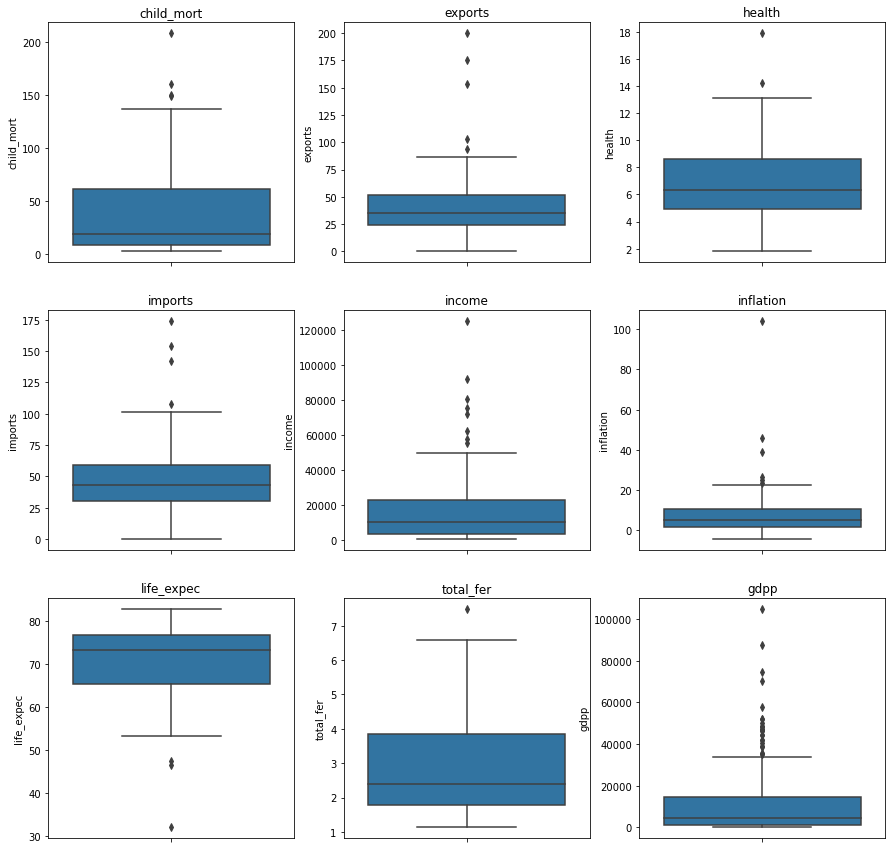

In [10]:
import seaborn as sns

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
n = 0
m = 0

for i in col:
    bp=sns.boxplot(y=X[i],ax=ax[n, m])
    ax[n, m].set_title(i)
    m = m + 1
    if m == 3:
        n = n+1
        m = m - 3

    

#### According the box plot above, we can tell there are so many outliers in the dataset. However since there are few country that are developed well, we can assume the outlier are reasonable, and we are not going to drop the outliner

### Next, let's Scaling the data

In [11]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

####  Lets plot elbow curve to determine how many number clusters will fix most

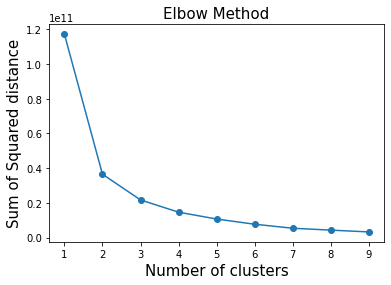

In [13]:
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(X)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

#### As the elbow menthod result shows, 3 will be choose as a number of clusters

### KMeans

17 ms ± 462 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


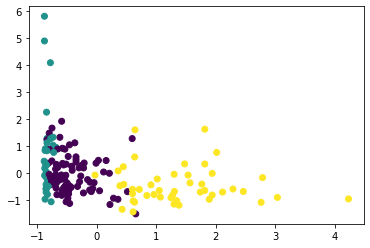

In [16]:
k_means = KMeans(n_clusters=3, random_state=123)
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# Plot the solution.
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.show()

#### Lets check the silhouette coefficient

In [17]:
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)

print("Silhouette score for three cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_3, metric='euclidean')))


Silhouette score for three cluster k-means: 0.2825524668179336



Next, Lets try another Hierarchical Clustering


### Hierarchical Clustering

In [18]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [21]:
print("Silhouette score for three cluster agglomerative clustering: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Silhouette score for three cluster agglomerative clustering: 0.15286693495207038


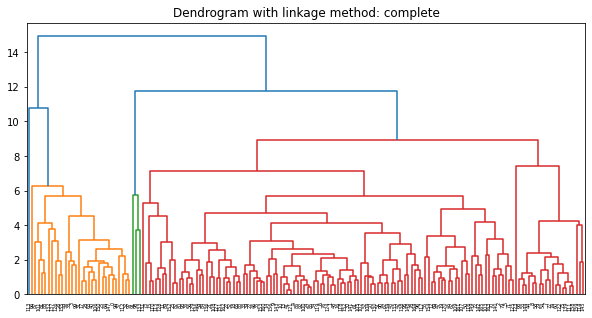

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Dendrogram with linkage method: complete")
dendrogram(linkage(X_std, method='complete'))
plt.show()

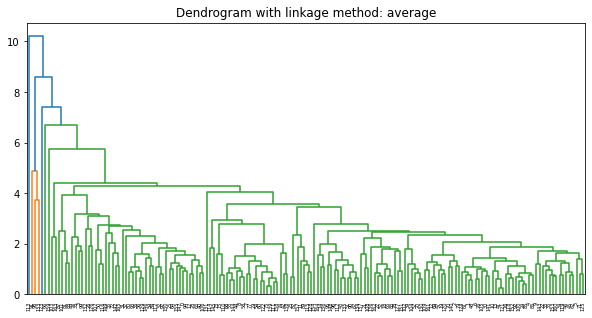

In [23]:
plt.figure(figsize=(10,5))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X_std, method='average'))
plt.show()

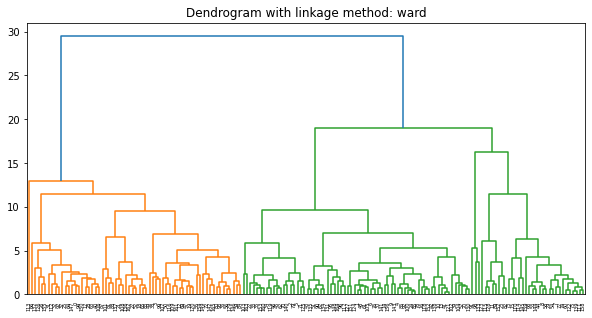

In [24]:
plt.figure(figsize=(10,5))
plt.title("Dendrogram with linkage method: ward")
dendrogram(linkage(X_std, method='ward'))
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, metrics

linkage_methods = ["ward", "average", "complete"]
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhoutte score of the Agglomerative Clustering solution: 0.15286693495207038


In [26]:
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhoutte score of the Agglomerative Clustering solution: 0.18167215807603876


In [27]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhoutte score of the Agglomerative Clustering solution: 0.22784145197126604


So far, we have tried K-means and Agglomerative Clustering

        the silhoutte best score of K-means:       0.282
        the silhoutte best score of Agglomerative: 0.228
        

### GMM

In [33]:
from sklearn.mixture import GaussianMixture


# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhoutte score of the GMM solution: 0.19125614408400807


In [34]:
#tied

# Defining the agglomerative clustering
gmm_cluster2 = GaussianMixture(n_components=3, random_state=123, covariance_type='tied')

# Fit model
clusters2 = gmm_cluster2.fit_predict(X_std)

print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters2, metric='euclidean')))

The silhoutte score of the GMM solution: 0.27544721437698316


In [35]:
#diag

# Defining the agglomerative clustering
gmm_cluster3 = GaussianMixture(n_components=3, random_state=123, covariance_type='diag')

# Fit model
clusters3 = gmm_cluster3.fit_predict(X_std)

print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters3, metric='euclidean')))

The silhoutte score of the GMM solution: 0.2225449847174844


In [36]:
#spherical

# Defining the agglomerative clustering
gmm_cluster4 = GaussianMixture(n_components=3, random_state=123, covariance_type='spherical')

# Fit model
clusters4 = gmm_cluster4.fit_predict(X_std)

print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters4, metric='euclidean')))

The silhoutte score of the GMM solution: 0.2742631602467805


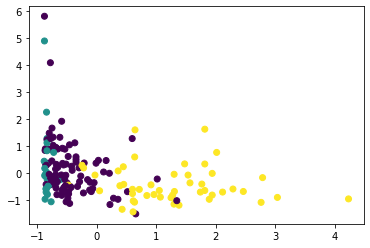

In [91]:
# Plot the solution.
plt.scatter(X_std[:,0], X_std[:,1], c=clusters2)
plt.show()

## DBSCAN

In [88]:
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters_dbscan = dbscan_cluster.fit_predict(X_std)

print("The silhoutte score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_dbscan, metric='euclidean')))

The silhoutte score of the DBSCAN solution: 0.07092846085994334


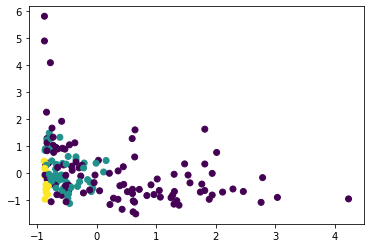

In [89]:
# Plot the solution.
plt.scatter(X_std[:,0], X_std[:,1], c=clusters_dbscan)
plt.show()

So far, we have following result:

    the silhoutte best score of K-means:                       0.282
    the silhoutte best score of Agglomerative:                 0.228
    the silhoutte best score of GMM in covariance type of diag:0.275
    the silhoutte best score of DBSCAN:                        0.071

#### As we can see, K-means performed better.

Let's visualize our clusters in the comparison of our variable and see how the clusters spread.

In [92]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X_std)

KMeans(n_clusters=3, random_state=123)

In [93]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

0    84
2    46
1    36
dtype: int64

In [118]:
num_cluster=kmeans.labels_
df['clusterN'] = num_cluster
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterN
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


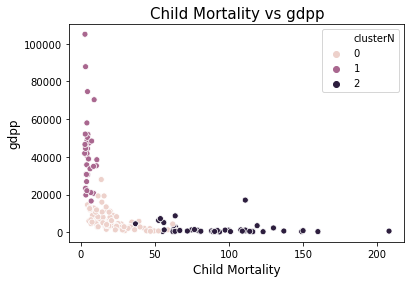

In [95]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(df['child_mort'],df['gdpp'],hue='clusterN',data=df) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

#### GDP:                  1 > 0 > 2


#### Child Mortality :     2 > 0 > 1

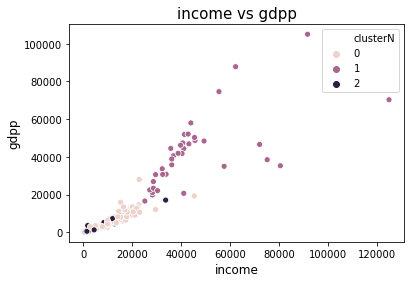

In [96]:
#visulization of clusters income vs gdpp
sns.scatterplot(df['income'],df['gdpp'],hue='clusterN',data=df) 
plt.title("income vs gdpp", fontsize=15)
plt.xlabel("income", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

#### Economic level :        1 > 0 > 3

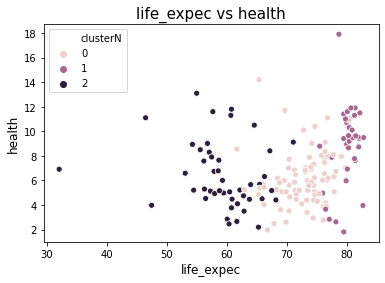

In [97]:
#visulization of life_expec vs health
sns.scatterplot(df['life_expec'],df['health'],hue='clusterN',data=df) 
plt.title("life_expec vs health", fontsize=15)
plt.xlabel("life_expec", fontsize=12)
plt.ylabel("health", fontsize=12)
plt.show()

life_expec = The average number of years a new born child would live if the current mortality patterns are to remain the same

health = Total health spending per capita.

#### life_expec:  1 > 0 > 2
#### health:         1 > 0 > 2

According to the comparison above, we can conclude that the cluster are group by the health and economic situation , and we can label our cluster as:

    0: Developing
    1: Developed
    2: under_developing_country


In [119]:
under_developing=df[df['clusterN']==2]['country']
developing=df[df['clusterN']==0]['country']
developed=df[df['clusterN']==1]['country']

print("Number of under_developing countries",len(under_developing))
print("Number of developing countries",len(developing))
print("Number of developed countries",len(developed))

Number of under_developing countries 46
Number of developing countries 84
Number of developed countries 36


### Conclusion and Recommendation

According to the analysis Above, under_developing_countries(cluster 2) are the countries that need the help the most. So we can recommend HELP International Organization focus on cluster 2 when they distribute the aid budget.

Let's also check the Dimensionality reduction techniques to visualize the observations.

### PCA

In [107]:
# We just want the first two principal components
pca = PCA(n_components=3)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X_std)

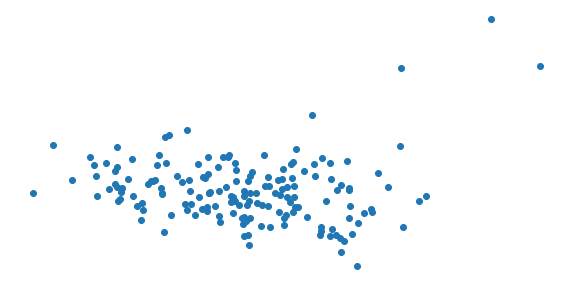

In [108]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)

We are un able to distinguish the different digits in the two-dimensional representation, Lets check t-SNE

### t-SNE

In [100]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 166 samples in 0.000s...
[t-SNE] Computed neighbors for 166 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 166 / 166
[t-SNE] Mean sigma: 72.627787
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.461319
[t-SNE] KL divergence after 300 iterations: 2.367216
t-SNE done! Time elapsed: 0.3065299987792969 seconds


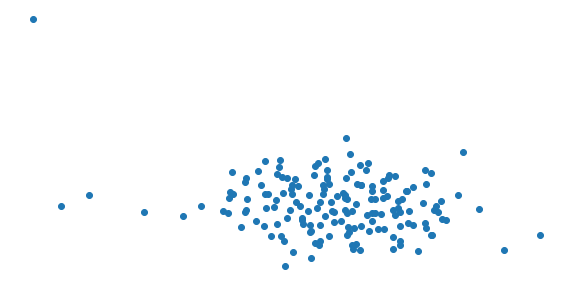

In [101]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

We are un able to distinguish the different digits in the two-dimensional representation, Lets check Umap

## Umap

In [103]:
import umap

In [113]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 1.766310214996338 seconds


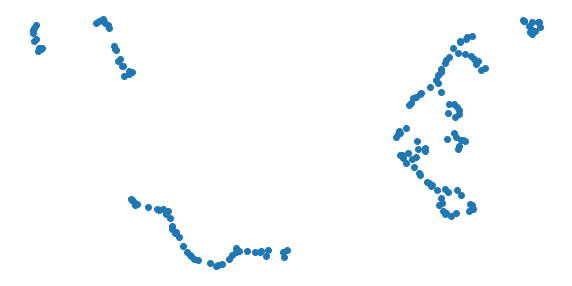

In [114]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

We can clearly identify 3 regions in the data. 